## Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a *regression model using regularisation* in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

##### The company wants to know:

- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

##### Business Goal- 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
# importing the requisite libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import sklearn 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Step 1: Reading and understanding the data 

In [2]:
# build a regression model using regularisation in order to predict the actual value of the prospective properties
# and decide whether to invest in them or not.
 
housing = pd.read_csv("train.csv",  engine='python')
housing. head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
housing.shape

(1460, 81)

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
housing.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

# Step 2: Data Cleaning and manupulation


In [6]:
# here our first concern is to convert 'MSSubClass', 'OverallQual','OverallCond' into categorical data 
housing['MSSubClass']=housing.MSSubClass.map({20:'1-STORY 1946 & NEWER ALL STYLES', 30:'1-STORY 1945 & OLDER', 40:'1-STORY W/FINISHED ATTIC ALL AGES',45:'1-1/2 STORY - UNFINISHED ALL AGES',50: '1-1/2 STORY FINISHED ALL AGES',60: '2-STORY 1946 & NEWER',70:'2-STORY 1945 & OLDER',75:'2-1/2 STORY ALL AGES',80:'SPLIT OR MULTI-LEVEL',85:'SPLIT FOYER',90:'DUPLEX - ALL STYLES AND AGES',120:'1-STORY PUD-1946 & NEWER', 150:'1-1/2 STORY PUD - ALL AGES',160:'2-STORY PUD - 1946 & NEWER',180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER', 190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})
housing['OverallQual'] =housing.OverallQual.map ({10:'Very Excellent',9:'Excellent',8:'Very Good',7:'Good',6:'Above Average',5:'Average', 4:'Below Average',3:'Fair',2:'Poor',1:'Very Poor'})
housing['OverallCond'] = housing.OverallCond.map ({10:'Very Excellent',9:'Excellent',8:'Very Good',7:'Good',6:'Above Average',5:'Average', 4:'Below Average',3:'Fair',2:'Poor',1:'Very Poor'})

housing.head()

Id                       MSSubClass MSZoning  LotFrontage  LotArea Street  \
0   1             2-STORY 1946 & NEWER       RL         65.0     8450   Pave   
1   2  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   Pave   
2   3             2-STORY 1946 & NEWER       RL         68.0    11250   Pave   
3   4             2-STORY 1945 & OLDER       RL         60.0     9550   Pave   
4   5             2-STORY 1946 & NEWER       RL         84.0    14260   Pave   

  Alley LotShape LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature  \
0   NaN      Reg         Lvl    AllPub  ...        0    NaN   NaN         NaN   
1   NaN      Reg         Lvl    AllPub  ...        0    NaN   NaN         NaN   
2   NaN      IR1         Lvl    AllPub  ...        0    NaN   NaN         NaN   
3   NaN      IR1         Lvl    AllPub  ...        0    NaN   NaN         NaN   
4   NaN      IR1         Lvl    AllPub  ...        0    NaN   NaN         NaN   

  MiscVal MoSold YrSold SaleType SaleCondition  SalePrice  
0       0      2   2008       WD        Normal     208500  
1       0      5   2007       WD        Normal     181500  
2       0      9   2008       WD        Normal     223500  
3       0      2   2006       WD       Abnorml     140000  
4       0     12   2008       WD        Normal     250000  

[5 rows x 81 columns]

In [7]:
null_perc = round(100*(housing.isnull().sum()/len(housing.index)), 2)
null_perc

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64

Removing columns which has more than 30% null values in it .

In [8]:
housing.drop(null_perc[ null_perc > 30].index, axis=1, inplace=True)
housing.shape

(1460, 76)

In [9]:
null_perc = round(100*(housing.isnull().sum()/len(housing.index)), 2)
null_perc

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 76, dtype: float64

In [10]:
pd.set_option("display.max_columns", None)
housing.head()

Id                       MSSubClass MSZoning  LotFrontage  LotArea Street  \
0   1             2-STORY 1946 & NEWER       RL         65.0     8450   Pave   
1   2  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   Pave   
2   3             2-STORY 1946 & NEWER       RL         68.0    11250   Pave   
3   4             2-STORY 1945 & OLDER       RL         60.0     9550   Pave   
4   5             2-STORY 1946 & NEWER       RL         84.0    14260   Pave   

  LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle    OverallQual OverallCond  YearBuilt  \
0       Norm     1Fam     2Story           Good     Average       2003   
1       Norm     1Fam     1Story  Above Average   Very Good       1976   
2       Norm     1Fam     2Story           Good     Average       2001   
3       Norm     1Fam     2Story           Good     Average       1915   
4       Norm     1Fam     2Story      Very Good     Average       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  \
0             1          Gd             8        Typ           0     Attchd   
1             1          TA             6        Typ           1     Attchd   
2             1          G

#### Removing redundant coloumns

In [11]:
housing.drop (['Id','SaleType', 'SaleCondition','YrSold','MoSold','MiscVal','GarageYrBlt','GarageCars','YearRemodAdd'],axis=1, inplace=True)
housing.shape

(1460, 67)

#### Capping the data to remove outliers

In [12]:
housing [['LotFrontage','LotArea', 'YearBuilt','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath', 'BsmtHalfBath', 'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces', 'GarageArea', 'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','SalePrice']].describe (percentiles = [0.01,0.02,0.05,0.1,0.9,0.98,0.99]).T         

count           mean           std      min        1%  \
LotFrontage    1201.0      70.049958     24.284752     21.0     21.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0   1680.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0   1899.18   
MasVnrArea     1452.0     103.685262    181.066207      0.0      0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0      0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0      0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0      0.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0      0.00   
1stFlrSF       1460.0    1162.626712    386.587738    334.0    520.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0      0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0      0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    692.18   
BsmtFullBath   1460.0       0.425342      0.518911      0.0      0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0      0.00   
FullBath       1460.0       1.565068      0.550916      0.0      1.00   
HalfBath       1460.0       0.382877      0.502885      0.0      0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0      1.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0      1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0      3.00   
Fireplaces     1460.0       0.613014      0.644666      0.0      0.00   
GarageArea     1460.0     472.980137    213.804841      0.0      0.00   
WoodDeckSF     1460.0      94.244521    125.338794      0.0      0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0      0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0      0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0      0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0      0.00   
PoolArea       1460.0       2.758904     40.177307      0.0      0.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  61815.97   

                     2%        5%       10%       50%       90%        98%  \
LotFrontage       24.00     34.00      44.0      69.0      96.0     124.00   
LotArea         2124.74   3311.70    5000.0    9478.5   14381.7   25251.62   
YearBuilt       1908.36   1916.00    1924.9    1973.0    2006.0    2008.00   
MasVnrArea         0.00      0.00       0.0       0.0     335.0     650.98   
BsmtFinSF1         0.00      0.00       0.0     383.5    1065.5    1442.64   
BsmtFinSF2         0.00      0.00       0.0       0.0     117.2     658.12   
BsmtUnfSF          0.00      0.00      74.9     477.5    1232.0    1678.20   
TotalBsmtSF        0.00    519.30     636.9     991.5    1602.2    2001.64   
1stFlrSF         583.70    672.95     756.9    1087.0    1680.0    2072.28   
2ndFlrSF           0.00      0.00       0.0       0.0     954.2    1318.56   
LowQualFinSF       0.00      0.00       0.0       0.0       0.0       0.00   
GrLivArea        768.00    848.00     912.0    1464.0    2158.3    2782.38   
BsmtFullBath       0.00      0.00       0.0       0.0       1.0       1.00   
BsmtHalfBath       0.00      0.00       0.0       0.0       0.0       1.00   
FullBath           1.00      1.00       1.0       2.0       2.0       3.00   
HalfBath           0.00      0.00       0.0       0.0       1.0       1.00   
BedroomAbvGr       1.00      2.00       2.0       3.0       4.0       4.00   
KitchenAbvGr       1.00      1.00       1.0       1.0       1.0       2.00   
TotRmsAbvGrd       4.00      4.00       5.0       6.0       9.0      10.82   
Fireplaces         0.00      0.00       0.0       1.0       1.0       2.00   
GarageArea         0.00      0.00     240.0     480.0     757.1     907.46   
WoodDeckSF         0.00      0.00       0.0       0.0     262.0     430.10   
OpenPorchSF        0.00      0.00       0.0      25.0     130.0     240.82   
EnclosedPorch      0.00   

### Visualing Numerical data

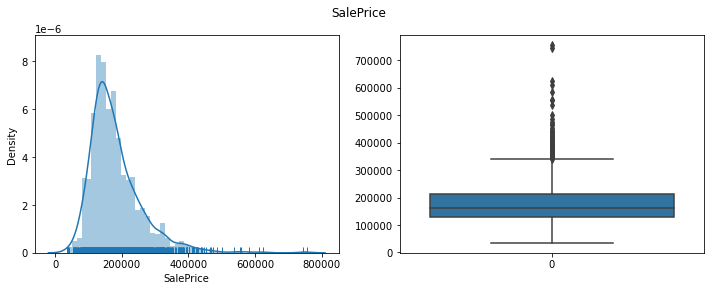

In [13]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.distplot(a=housing.SalePrice, rug=True)
plt.subplot(1,2,2)
#Box plot
sns.boxplot(data=housing.SalePrice)
#Single title for both subplots.
plt.suptitle('SalePrice')
plt.show()

### Applying a logarithmic transform to reduce the right bias in saleprice

In [14]:
housing['SalePrice'] = np.log(housing['SalePrice'])

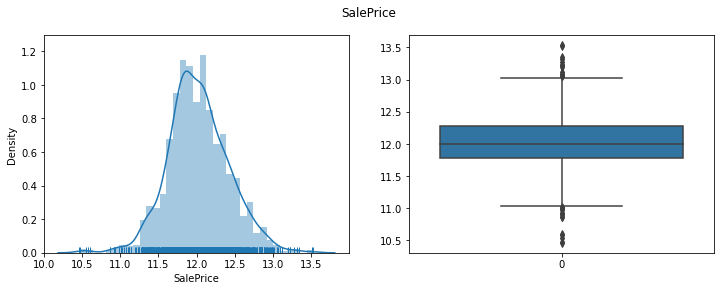

In [15]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.distplot(a=housing.SalePrice, rug=True)
plt.subplot(1,2,2)
#Box plot
sns.boxplot(data=housing.SalePrice)
#Single title for both subplots.
plt.suptitle('SalePrice')
plt.show()

In [16]:
numerical_cols=housing.select_dtypes(exclude=['object']).columns
housing[numerical_cols]

LotFrontage  LotArea  YearBuilt  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0            65.0     8450       2003       196.0         706           0   
1            80.0     9600       1976         0.0         978           0   
2            68.0    11250       2001       162.0         486           0   
3            60.0     9550       1915         0.0         216           0   
4            84.0    14260       2000       350.0         655           0   
...           ...      ...        ...         ...         ...         ...   
1455         62.0     7917       1999         0.0           0           0   
1456         85.0    13175       1978       119.0         790         163   
1457         66.0     9042       1941         0.0         275           0   
1458         68.0     9717       1950         0.0          49        1029   
1459         75.0     9937       1965         0.0         830         290   

      BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0           150          856       856       854             0       1710   
1           284         1262      1262         0             0       1262   
2           434          920       920       866             0       1786   
3           540          756       961       756             0       1717   
4           490         1145      1145      1053             0       2198   
...         ...          ...       ...       ...           ...        ...   
1455        953          953       953       694             0       1647   
1456        589         1542      2073         0             0       2073   
1457        877         1152      1188      1152             0       2340   
1458          0         1078      1078         0             0       1078   
1459        136         1256      1256         0             0       1256   

      BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0                1             0         2         1             3   
1                0             1         2         0             3   
2                1             0         2         1             3   
3                1             0         1         0             3   
4                1             0         2         1             4   
...            ...           ...       ...       ...           ...   
1455             0             0         2         1             3   
1456             1             0         2         0             3   
1457             0             0         2         0             4   
1458             1             0         1         0             2   
1459             1             0         1         1             3   

      KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageArea  WoodDeckSF  \
0                1             8           0         548           0   
1                1             6           1         460         298   
2                1             6           1         608           0   
3                1             7           1         642           0   
4                1             9           1         836         192   
...            ...           ...         ...         ...         ...   
1455             1             7           1         460           0   
1456             1             7           2         500         349   
1457             1             9           2         252           0   
1458             1             5           0         240         366   
1459             1             6           0         276         736   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  SalePrice  
0              61              0          0            0         0  12.247694  
1               0              0          0            0         0  12.109011  
2              42              0          0            0         0  12.317167  
3              35            272          0            0         0  11.849398  
4              84              0          0       

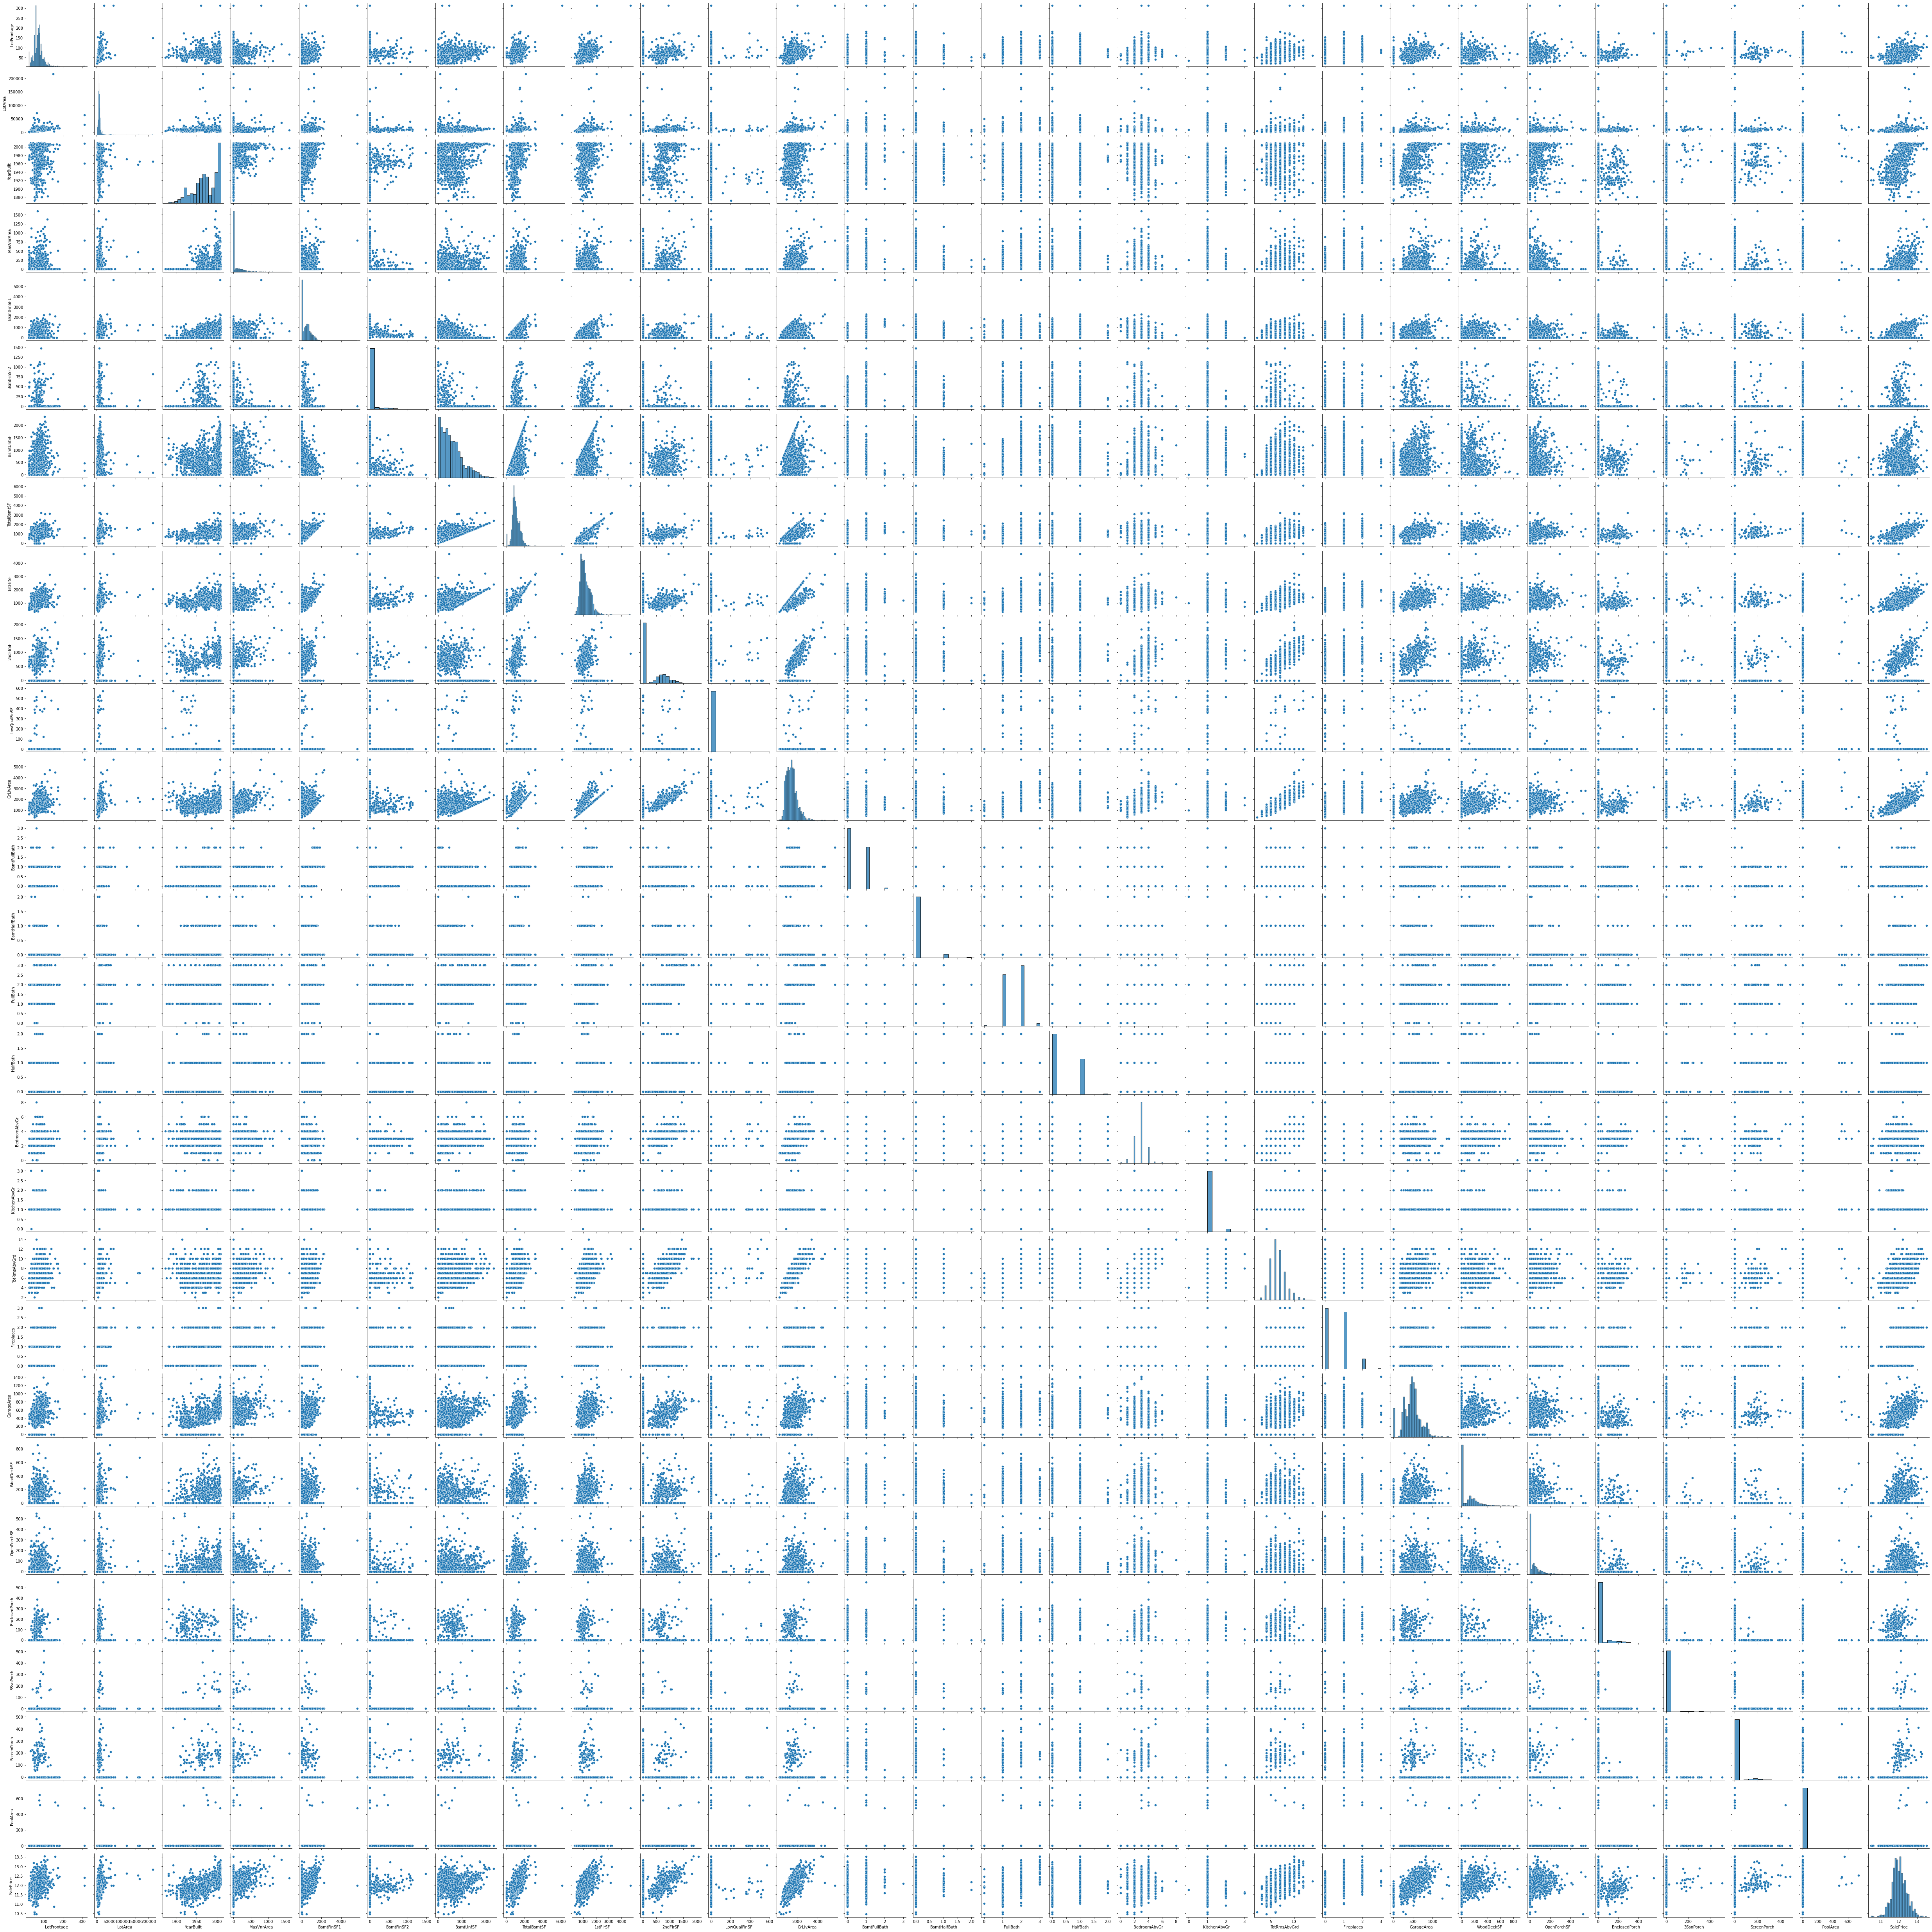

In [17]:
# Using Seaborn and matplotlib a pair plot is constructed 
df = sns.pairplot (housing[numerical_cols])
plt.show ()

### Observations From the pair plots
- Most lotfontage is in 100 feet 
- Whereas the lot area is witin 500 and doesnt really affect the sale price
- Most houses are built in 2000 and had more similar aboservations
#### <font color='red'>*The data set is too huge to spot multicolinearity or to decide on eliminating coloumns, but the pairplot fairly states the relationship of the variable and an overview of their status and behavior</font>


### Visualing Categorical data

In [17]:
categorical_cols=housing.select_dtypes(include=['object']).columns.values.tolist()

In [18]:
housing[categorical_cols].head()

MSSubClass MSZoning Street LotShape LandContour  \
0             2-STORY 1946 & NEWER       RL   Pave      Reg         Lvl   
1  1-STORY 1946 & NEWER ALL STYLES       RL   Pave      Reg         Lvl   
2             2-STORY 1946 & NEWER       RL   Pave      IR1         Lvl   
3             2-STORY 1945 & OLDER       RL   Pave      IR1         Lvl   
4             2-STORY 1946 & NEWER       RL   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle    OverallQual OverallCond RoofStyle RoofMatl Exterior1st  \
0     2Story           Good     Average     Gable  CompShg     VinylSd   
1     1Story  Above Average   Very Good     Gable  CompShg     MetalSd   
2     2Story           Good     Average     Gable  CompShg     VinylSd   
3     2Story           Good     Average     Gable  CompShg     Wd Sdng   
4     2Story      Very Good     Average     Gable  CompShg     VinylSd   

  Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA   
1     MetalSd       None        TA        TA     CBlock       Gd       TA   
2     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA   
3     Wd Shng       None        TA        TA     BrkTil       TA       Gd   
4     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir  \
0           No          GLQ          Unf    GasA        Ex          Y   
1           Gd          ALQ          Unf    GasA        Ex          Y   
2           Mn          GLQ          Unf    GasA        Ex          Y   
3           No          ALQ          Unf    GasA        Gd          Y   
4           Av          GLQ          Unf    GasA        Ex          Y   

  Electrical KitchenQual Functional GarageType GarageFinish GarageQual  \
0      SBrkr          Gd        Typ     Attchd          RFn         TA   
1      SBrkr          TA        Typ     Attchd          RFn         TA   
2      SBrkr          Gd        Typ     Attchd          RFn         TA   
3      SBrkr          Gd        Typ     Detchd          Unf         TA   
4      SBrkr          Gd        Typ     Attchd          RFn         TA   

  GarageCond PavedDrive  
0         TA          Y  
1         TA          Y  
2         TA          Y  
3         TA          Y  
4         TA          Y

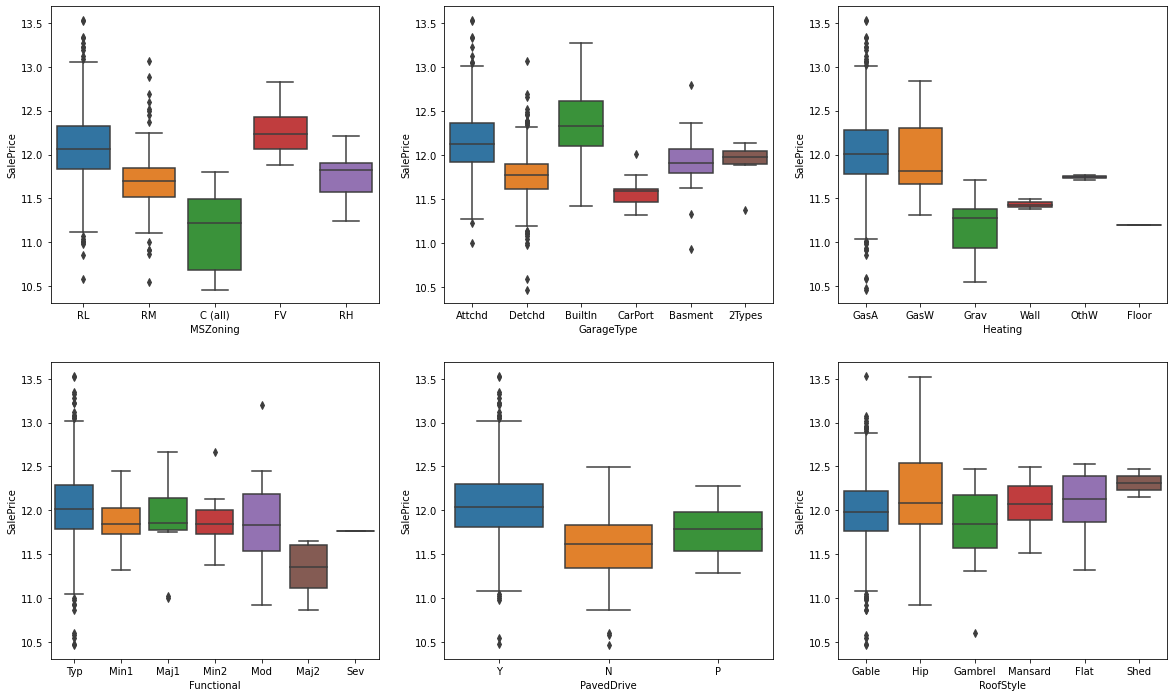

In [19]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = housing)

plt.subplot(2,3,2)
sns.boxplot(x = 'GarageType', y = 'SalePrice', data = housing)

plt.subplot(2,3,3)
sns.boxplot(x = 'Heating', y = 'SalePrice', data = housing)

plt.subplot(2,3,4)
sns.boxplot(x = 'Functional', y = 'SalePrice', data = housing)

plt.subplot(2,3,5)
sns.boxplot(x = 'PavedDrive', y = 'SalePrice', data = housing)

plt.subplot(2,3,6)
sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = housing)

plt.show()

In [20]:
# correlation matrix
housing_corr = housing.corr()
housing_corr

LotFrontage   LotArea  YearBuilt  MasVnrArea  BsmtFinSF1  \
LotFrontage       1.000000  0.426095   0.123349    0.193458    0.233633   
LotArea           0.426095  1.000000   0.014228    0.104160    0.214103   
YearBuilt         0.123349  0.014228   1.000000    0.315707    0.249503   
MasVnrArea        0.193458  0.104160   0.315707    1.000000    0.264736   
BsmtFinSF1        0.233633  0.214103   0.249503    0.264736    1.000000   
BsmtFinSF2        0.049900  0.111170  -0.049107   -0.072319   -0.050117   
BsmtUnfSF         0.132644 -0.002618   0.149040    0.114442   -0.495251   
TotalBsmtSF       0.392075  0.260833   0.391452    0.363936    0.522396   
1stFlrSF          0.457181  0.299475   0.281986    0.344501    0.445863   
2ndFlrSF          0.080177  0.050986   0.010308    0.174561   -0.137079   
LowQualFinSF      0.038469  0.004779  -0.183784   -0.069071   -0.064503   
GrLivArea         0.402797  0.263116   0.199010    0.390857    0.208171   
BsmtFullBath      0.100949  0.158155   0.187599    0.085310    0.649212   
BsmtHalfBath     -0.007234  0.048046  -0.038162    0.026673    0.067418   
FullBath          0.198769  0.126031   0.468271    0.276833    0.058543   
HalfBath          0.053532  0.014259   0.242656    0.201444    0.004262   
BedroomAbvGr      0.263170  0.119690  -0.070651    0.102821   -0.107355   
KitchenAbvGr     -0.006069 -0.017784  -0.174800   -0.037610   -0.081007   
TotRmsAbvGrd      0.352096  0.190015   0.095589    0.280682    0.044316   
Fireplaces        0.266639  0.271364   0.147716    0.249070    0.260011   
GarageArea        0.344997  0.180403   0.478954    0.373066    0.296970   
WoodDeckSF        0.088521  0.171698   0.224880    0.159718    0.204306   
OpenPorchSF       0.151972  0.084774   0.188686    0.125703    0.111761   
EnclosedPorch     0.010700 -0.018340  -0.387268   -0.110204   -0.102303   
3SsnPorch         0.070029  0.020423   0.031355    0.018796    0.026451   
ScreenPorch       0.041383  0.043160  -0.050364    0.061466    0.062021   
PoolArea          0.206167  0.077672   0.004950    0.011723    0.140491   
SalePrice         0.355878  0.257320   0.586570    0.430809    0.372023   

               BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
LotFrontage      0.049900   0.132644     0.392075  0.457181  0.080177   
LotArea          0.111170  -0.002618     0.260833  0.299475  0.050986   
YearBuilt       -0.049107   0.149040     0.391452  0.281986  0.010308   
MasVnrArea      -0.072319   0.114442     0.363936  0.344501  0.174561   
BsmtFinSF1      -0.050117  -0.495251     0.522396  0.445863 -0.137079   
BsmtFinSF2       1.000000  -0.209294     0.104810  0.097117 -0.099260   
BsmtUnfSF       -0.209294   1.000000     0.415360  0.317987  0.004469   
TotalBsmtSF      0.104810   0.415360     1.000000  0.819530 -0.174512   
1stFlrSF         0.097117   0.317987     0.819530  1.000000 -0.202646   
2ndFlrSF        -0.099260   0.004469    -0.174512 -0.202646  1.000000   
LowQualFinSF     0.014807   0.028167    -0.033245 -0.014241  0.063353   
GrLivArea       -0.009640   0.240257     0.454868  0.566024  0.687501   
BsmtFullBath     0.158678  -0.422900     0.307351  0.244671 -0.169494   
BsmtHalfBath     0.070948  -0.095804    -0.000315  0.001956 -0.023855   
FullBath        -0.076444   0.288886     0.323722  0.380637  0.421378   
HalfBath        -0.032148  -0.041118    -0.048804 -0.119916  0.609707   
BedroomAbvGr    -0.015728   0.166643     0.050450  0.127401  0.502901   
KitchenAbvGr    -0.040751   0.030086    -0.068901  0.068101  0.059306   
TotRmsAbvGrd    -0.035227   0.250647     0.285573  0.409516  0.616423   
Fireplaces       0.046921   0.051575     0.339519  0.410531  0.194561   
GarageArea      -0.018227   0.183303     0.486665  0.489782  0.138347   
WoodDeckSF       0.067898  -0.005316     0.232019  0.235459  0.092165   
OpenPorchSF      0.003093   0.129005     0.247264  0.211671  0.208026   
EnclosedPorch    0.036543  -0.002538    -0.095478 -0.065292  0.061989   
3SsnPorch     

# Step 4 : Data preperation


### A.Create Dummy Variables
### B. Divide the dataframe into train and test set
### C. Preform scaling
### D. Distribute variables into dependent and independent variables 

### <font color='red'>A. Create Dummy Variables</font>


In [21]:
# creating dummy variables for categorical variables

# subset all categorical variables
housing_categorical = housing.select_dtypes(include=['object'])
housing_categorical.head()

MSSubClass MSZoning Street LotShape LandContour  \
0             2-STORY 1946 & NEWER       RL   Pave      Reg         Lvl   
1  1-STORY 1946 & NEWER ALL STYLES       RL   Pave      Reg         Lvl   
2             2-STORY 1946 & NEWER       RL   Pave      IR1         Lvl   
3             2-STORY 1945 & OLDER       RL   Pave      IR1         Lvl   
4             2-STORY 1946 & NEWER       RL   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle    OverallQual OverallCond RoofStyle RoofMatl Exterior1st  \
0     2Story           Good     Average     Gable  CompShg     VinylSd   
1     1Story  Above Average   Very Good     Gable  CompShg     MetalSd   
2     2Story           Good     Average     Gable  CompShg     VinylSd   
3     2Story           Good     Average     Gable  CompShg     Wd Sdng   
4     2Story      Very Good     Average     Gable  CompShg     VinylSd   

  Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA   
1     MetalSd       None        TA        TA     CBlock       Gd       TA   
2     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA   
3     Wd Shng       None        TA        TA     BrkTil       TA       Gd   
4     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir  \
0           No          GLQ          Unf    GasA        Ex          Y   
1           Gd          ALQ          Unf    GasA        Ex          Y   
2           Mn          GLQ          Unf    GasA        Ex          Y   
3           No          ALQ          Unf    GasA        Gd          Y   
4           Av          GLQ          Unf    GasA        Ex          Y   

  Electrical KitchenQual Functional GarageType GarageFinish GarageQual  \
0      SBrkr          Gd        Typ     Attchd          RFn         TA   
1      SBrkr          TA        Typ     Attchd          RFn         TA   
2      SBrkr          Gd        Typ     Attchd          RFn         TA   
3      SBrkr          Gd        Typ     Detchd          Unf         TA   
4      SBrkr          Gd        Typ     Attchd          RFn         TA   

  GarageCond PavedDrive  
0         TA          Y  
1         TA          Y  
2         TA          Y  
3         TA          Y  
4         TA          Y

In [22]:
# convert into dummies - one hot encoding
housing_dummies = pd.get_dummies(housing_categorical, drop_first=True)
housing_dummies.head()

MSSubClass_1-1/2 STORY FINISHED ALL AGES  MSSubClass_1-STORY 1945 & OLDER  \
0                                         0                                0   
1                                         0                                0   
2                                         0                                0   
3                                         0                                0   
4                                         0                                0   

   MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
0                                           0   
1                                           1   
2                                           0   
3                                           0   
4                                           0   

   MSSubClass_1-STORY PUD-1946 & NEWER  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   

   MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   MSSubClass_2-1/2 STORY ALL AGES  MSSubClass_2-STORY 1945 & OLDER  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                1   
4                                0                                0   

   MSSubClass_2-STORY 1946 & NEWER  MSSubClass_2-STORY PUD - 1946 & NEWER  \
0                                1                                      0   
1                                0                                      0   
2                                1                                      0   
3                                0                                      0   
4                                1                                      0   

   MSSubClass_DUPLEX - ALL STYLES AND AGES  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER  MSSubClass_SPLIT FOYER  \
0                                                  0                        0   
1                                                  0                        0   
2                                                  0                        0   
3                                                  0                        0   
4                                                  0                        0   

   MSSubClass_SPLIT OR MULTI-LEVEL  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0                                0            0            0            1   
1                                0            0            0            1   
2                                0            0            0            1   
3                                0            0            0            1   
4                                0            0            0            1   

   MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0            0            1             0             0             1   
1            0            1             0        

In [23]:
# drop categorical variables 
housing = housing.drop(list(housing_categorical.columns), axis=1)

In [24]:
# concat dummy variables with X
housing = pd.concat([housing, housing_dummies], axis=1)

In [25]:
housing.head()

LotFrontage  LotArea  YearBuilt  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0         65.0     8450       2003       196.0         706           0   
1         80.0     9600       1976         0.0         978           0   
2         68.0    11250       2001       162.0         486           0   
3         60.0     9550       1915         0.0         216           0   
4         84.0    14260       2000       350.0         655           0   

   BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0        150          856       856       854             0       1710   
1        284         1262      1262         0             0       1262   
2        434          920       920       866             0       1786   
3        540          756       961       756             0       1717   
4        490         1145      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   TotRmsAbvGrd  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
0             8           0         548           0           61   
1             6           1         460         298            0   
2             6           1         608           0           42   
3             7           1         642           0           35   
4             9           1         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  SalePrice  \
0              0          0            0         0  12.247694   
1              0          0            0         0  12.109011   
2              0          0            0         0  12.317167   
3            272          0            0         0  11.849398   
4              0          0            0         0  12.429216   

   MSSubClass_1-1/2 STORY FINISHED ALL AGES  MSSubClass_1-STORY 1945 & OLDER  \
0                                         0                                0   
1                                         0                                0   
2                                         0                                0   
3                                         0                                0   
4                                         0                                0   

   MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
0                                           0   
1                                           1   
2                                           0   
3                                           0   
4                                           0   

   MSSubClass_1-STORY PUD-1946 & NEWER  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   

   MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   MSSubClass_2-1/2 STORY ALL AGES  MSSubClass_2-STORY 1945 & OLDER  \
0                                0                              

In [26]:
housing.shape

(1460, 242)

In [27]:
housing.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       ...
       'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_Po', 'GarageQual_TA',
       'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_Po', 'GarageCond_TA',
       'PavedDrive_P', 'PavedDrive_Y'],
      dtype='object', length=242)

### <font color='red'>B. Divide the dataframe into train and test set</font>

In [28]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.75, test_size = 0.25, random_state = 100)

In [29]:
df_train.head()

LotFrontage  LotArea  YearBuilt  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
774        110.0    14226       2006       375.0           0           0   
92          80.0    13360       1921         0.0         713           0   
360          NaN     7540       1978         0.0         773           0   
549         75.0     9375       2003         0.0           0           0   
546         70.0     8737       1923         0.0         300           0   

     BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
774       1935         1935      1973         0             0       1973   
92         163          876       964         0             0        964   
360        115          888       912         0             0        912   
549        912          912       912      1182             0       2094   
546        765         1065       915       720             0       1635   

     BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
774             0             0         2         0             3   
92              1             0         1         0             2   
360             1             0         1         0             2   
549             0             0         2         1             4   
546             0             0         1         1             3   

     KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageArea  WoodDeckSF  \
774             1             9           1         895         315   
92              1             5           0         432           0   
360             1             5           1         470           0   
549             1             8           1         615         182   
546             1             6           1         440           0   

     OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  SalePrice  \
774           45              0          0            0         0  12.886641   
92             0             44          0            0         0  12.004568   
360            0              0          0          192         0  11.957611   
549          182              0          0            0         0  12.479909   
546           38              0        144            0         0  12.254863   

     MSSubClass_1-1/2 STORY FINISHED ALL AGES  \
774                                         0   
92                                          0   
360                                         0   
549                                         0   
546                                         1   

     MSSubClass_1-STORY 1945 & OLDER  \
774                                0   
92                                 1   
360                                0   
549                                0   
546                                0   

     MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
774                                           1   
92                                            0   
360                                           0   
549                                           0   
546                                           0   

     MSSubClass_1-STORY PUD-1946 & NEWER  \
774                                    0   
92                                     0   
360                                    0   
549                                    0   
546                                    0   

     MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  \
774                                             0   
92                                              0   
360                                             0   
549                                             0   
546                                             0   

     MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES  \
774                                                  0      
92                                                   0      
360                                                  0      
549                                                  0      
546                                 

### <font color='red'>C. Preform scaling </font>

In [30]:
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the'dummy' variables
num_vars = df_train.select_dtypes(exclude=['object']).columns
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

scaler = MinMaxScaler()
# Apply scaler() to all the columns except the'dummy' variables
num_vars = df_test.select_dtypes(exclude=['object']).columns
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])


### <font color='red'>D. Distribute variables into dependent and independent variables</font>

In [31]:
y_train = df_train.pop('SalePrice')
X_train = df_train
y_test = df_test.pop('SalePrice')
X_test = df_test

# Step 5 :Model Building and Evaluation


## Linear Regression

Let's now try predicting prices, a dataset using linear regression.

In [32]:
#To avoid value error
X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [33]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [34]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-2173889633.5172176
[ 6.76394375e-03  2.32145384e-01  1.16073778e-01  1.63770253e-02
  3.15487854e+11  8.23935325e+10  1.30577539e+11 -3.41536285e+11
  1.42290958e+11  6.80163953e+10  1.69629267e+10 -1.71407904e+11
  2.84500122e-02  9.17243958e-03  2.17552185e-02  1.16882324e-02
 -5.12218475e-03 -6.78482056e-02  2.00290680e-02  1.73683167e-02
  6.72187805e-02  1.32465363e-02  1.44262314e-02  1.25989914e-02
  3.36017609e-02  1.64241791e-02  3.35388184e-02  7.05566406e-02
  4.78191376e-02  6.93969727e-02  6.27975464e-02  2.10647583e-02
 -1.71084059e+10  3.33690643e-02  8.16984177e-02  6.73980713e-02
  3.43551636e-02 -3.12925731e+10  3.89060974e-02  6.81056976e-02
  5.24368286e-02  1.52067184e-01  1.42082214e-01  1.45278931e-01
  1.26098633e-01  2.83985138e-02  5.28717041e-03  9.21630859e-03
  2.53295898e-03  5.16128540e-03 -3.53455544e-03  2.98690796e-03
 -7.76605606e-02  9.74273682e-03 -1.22375488e-02 -7.22980499e-03
 -3.50952148e-03  3.80992889e-03 -8.29153061e-02  2.60925293e-02
  2.7

In [35]:
#To avoid value error
X_test = X_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [36]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_train_lr-",(r2_train_lr))
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test_lr-",r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss1_lr-",rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss2_lr-",rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse_train_lr-",mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse_test_lr-",mse_test_lr)
metric.append(mse_test_lr**0.5)

r2_train_lr- 0.953555892565304
r2_test_lr- -1.3742348757844785e+23
rss1_lr- 0.8372671675500266
rss2_lr- 1.109051179893476e+24
mse_train_lr- 0.0007646275502739969
mse_test_lr- 3.0384963832697974e+21


In [37]:
df = pd.DataFrame( data = lm.coef_, columns = ['Coefficient'] ,index = X_train.columns)
df.head()

Coefficient
LotFrontage  6.763944e-03
LotArea      2.321454e-01
YearBuilt    1.160738e-01
MasVnrArea   1.637703e-02
BsmtFinSF1   3.154879e+11

## Step 6: Ridge and Lasso Regression

Let's now try predicting Sale Prices for housing properties, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression

In [38]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.3s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [39]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 2.0}


In [40]:
#Fitting Ridge model for alpha = 2.0 and printing coefficients which have been penalised
alpha = 2.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge_coef_sort = ridge.coef_.sort()
print(ridge.coef_)

[-8.84483981e-02 -7.18749919e-02 -6.03115455e-02 -4.47763351e-02
 -4.31395594e-02 -2.99539542e-02 -2.97729245e-02 -2.96066773e-02
 -2.78515200e-02 -2.73272831e-02 -2.69784619e-02 -2.54773920e-02
 -2.50242547e-02 -2.46718462e-02 -2.30740539e-02 -2.28890360e-02
 -2.27507556e-02 -2.15916800e-02 -2.14683386e-02 -2.08811503e-02
 -2.05719655e-02 -2.05719655e-02 -2.05719655e-02 -2.05430162e-02
 -2.04767957e-02 -2.02627030e-02 -2.00116928e-02 -1.93367049e-02
 -1.77831753e-02 -1.72977287e-02 -1.71953172e-02 -1.67989570e-02
 -1.55455337e-02 -1.55448385e-02 -1.55040536e-02 -1.53514211e-02
 -1.53383957e-02 -1.50741409e-02 -1.46705427e-02 -1.45954802e-02
 -1.41490292e-02 -1.36791344e-02 -1.30252805e-02 -1.20777095e-02
 -1.17098135e-02 -1.14136091e-02 -1.13946674e-02 -1.12429574e-02
 -1.11758934e-02 -1.08752377e-02 -1.08407451e-02 -1.07400246e-02
 -1.00185388e-02 -8.71241455e-03 -8.60550993e-03 -8.21414338e-03
 -8.16200520e-03 -7.89353626e-03 -7.79899451e-03 -7.42031701e-03
 -7.29387248e-03 -7.13069

In [41]:

df = pd.DataFrame( data = ridge.coef_, columns = ['Coefficient'] ,index = X_train.columns)
df.sort_values(by=["Coefficient"],ascending=False) 

Coefficient
PavedDrive_Y      0.105855
PavedDrive_P      0.090110
GarageCond_TA     0.075587
GarageCond_Po     0.065018
GarageCond_Gd     0.061026
...                    ...
BsmtFinSF1       -0.043140
MasVnrArea       -0.044776
YearBuilt        -0.060312
LotArea          -0.071875
LotFrontage      -0.088448

[241 rows x 1 columns]

In [42]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

-0.8022618707353399
-0.8420045376812306
32.49012146084894
14.86556149812698
0.029671343799862044
0.040727565748293094


## Lasso

In [43]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.2s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [44]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [45]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [46]:
lasso.coef_

array([-0.00000000e+00,  2.08031134e-02,  5.91780311e-02,  3.63580123e-04,
        0.00000000e+00,  1.57474496e-02,  1.66385662e-02,  0.00000000e+00,
        0.00000000e+00,  1.88562788e-03, -1.60041173e-04,  3.77697869e-01,
        5.22523619e-02,  9.58285551e-03,  5.06434094e-02,  2.15165378e-02,
        0.00000000e+00, -4.69947444e-02,  4.06564999e-02,  3.14902279e-02,
        6.68419275e-02,  1.75453308e-02,  2.43539962e-04,  8.30542346e-04,
        9.23174883e-03,  1.40419552e-02, -4.47587316e-02,  0.00000000e+00,
       -1.60101965e-02,  1.30906021e-02, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  3.62676680e-03,  1.18088359e-02, -5.50096975e-03,
       -2.64728505e-02,  0.00000000e+00, -5.44087008e-03,  0.00000000e+00,
        0.00000000e+00,  4.05608448e-02,  4.20683330e-02,  4.58457491e-02,
        3.21991937e-02,  0.00000000e+00,  8.16442605e-03, -8.72617105e-03,
        1.20818125e-03,  1.21111324e-02,  1.74527900e-02,  1.21952775e-02,
       -0.00000000e+00,  

In [47]:
pd.set_option('display.max_rows', None)
df = pd.DataFrame( data = lasso.coef_, columns = ['Coefficient'] ,index = X_train.columns)
df.sort_values(by=["Coefficient"],ascending=False) 

Coefficient
GrLivArea                                              0.377698
GarageArea                                             0.066842
OverallQual_Excellent                                  0.064074
YearBuilt                                              0.059178
BsmtFullBath                                           0.052252
FullBath                                               0.050643
MSZoning_RL                                            0.045846
RoofMatl_WdShngl                                       0.044398
Neighborhood_Crawfor                                   0.043781
MSZoning_RH                                            0.042068
TotRmsAbvGrd                                           0.040656
MSZoning_FV                                            0.040561
Neighborhood_NridgHt                                   0.039856
Neighborhood_Somerst                                   0.037307
OverallQual_Very Good                                  0.033063
Neighborhood_StoneBr                                   0.032261
MSZoning_RM                                            0.032199
Fireplaces                                             0.031490
BsmtExposure_Gd                                        0.028077
OverallCond_Excellent                                  0.026959
CentralAir_Y                                           0.026085
Neighborhood_NoRidge                                   0.025668
Heating_GasW                                           0.024956
Neighborhood_ClearCr                                   0.024226
Exterior1st_BrkFace                                    0.023509
OverallQual_Very Excellent                             0.023427
RoofMatl_CompShg                                       0.023042
HalfBath                                               0.021517
LotArea                                                0.020803
Condition1_Norm                                        0.019337
WoodDeckSF                                             0.017545
LandContour_Low                                        0.017453
GarageQual_Gd                                          0.016957
OverallCond_Very Good                                  0.016827
BsmtUnfSF                                              0.016639
BsmtCond_Gd                                            0.016035
BsmtFinSF2                                             0.015747
BsmtCond_TA                                            0.015208
Functional_Typ                                         0.014895
LotConfig_CulDSac                                      0.014778
ScreenPorch                                            0.014042
Neighborhood_Veenker                                   0.013366
MSSubClass_1-STORY 1946 & NEWER ALL STYLES             0.013091
GarageType_Attchd                                      0.013070
OverallQual_Good                                       0.012268
LandContour_Lvl                                        0.012195
LandContour_HLS                                        0.012111
MSSubClass_2-STORY 1945 & OLDER                        0.011809
OverallCond_Good                                       0.011481
Exterior2nd_VinylSd                                    0.010125
BsmtHalfBath                                           0.009583
Neighborhood_BrkSide                                   0.009455
RoofStyle_Mansard                                      0.009369
3SsnPorch                                              0.009232
Foundation_PConc                                       0.008886
Condition1_RRAn                                        0.008636
LotShape_IR2                                           0.008164
GarageType_Detchd                                      0.007483
BsmtFinType2_Unf                                       0.006202
Exterior2nd_CmentBd                                    0.005899
GarageType_BuiltIn                                     0.005292
GarageCond_TA                                          0.005109
BsmtFinType1_GLQ    

#### <font color='red'> Conclusion - Lasso predicts that, GrLivArea: Above grade (ground) living area square feet, is the strongest predicting factor for the sale price of the housing</font>


In [48]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9208689578078042
0.824342377890964
1.4265280833461904
1.41761278577725
0.0013027653729188954
0.0038838706459650685


In [49]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       9.535559e-01         -0.802262          0.920869
1   R2 Score (Test)      -1.374235e+23         -0.842005          0.824342
2       RSS (Train)       8.372672e-01         32.490121          1.426528
3        RSS (Test)       1.109051e+24         14.865561          1.417613
4       MSE (Train)       2.765190e-02          0.172254          0.036094
5        MSE (Test)       5.512256e+10          0.201811          0.062321

# Step 6 : Residual Analysis 

<AxesSubplot:ylabel='Density'>

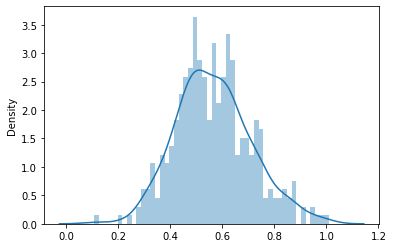

In [50]:
sns.distplot((y_pred_test), bins = 50)

Ploting a histogram of the residuals to make sure it looks normally distributed.

# Step 7 : Checking Magnitudes of Coeffients with regularizations

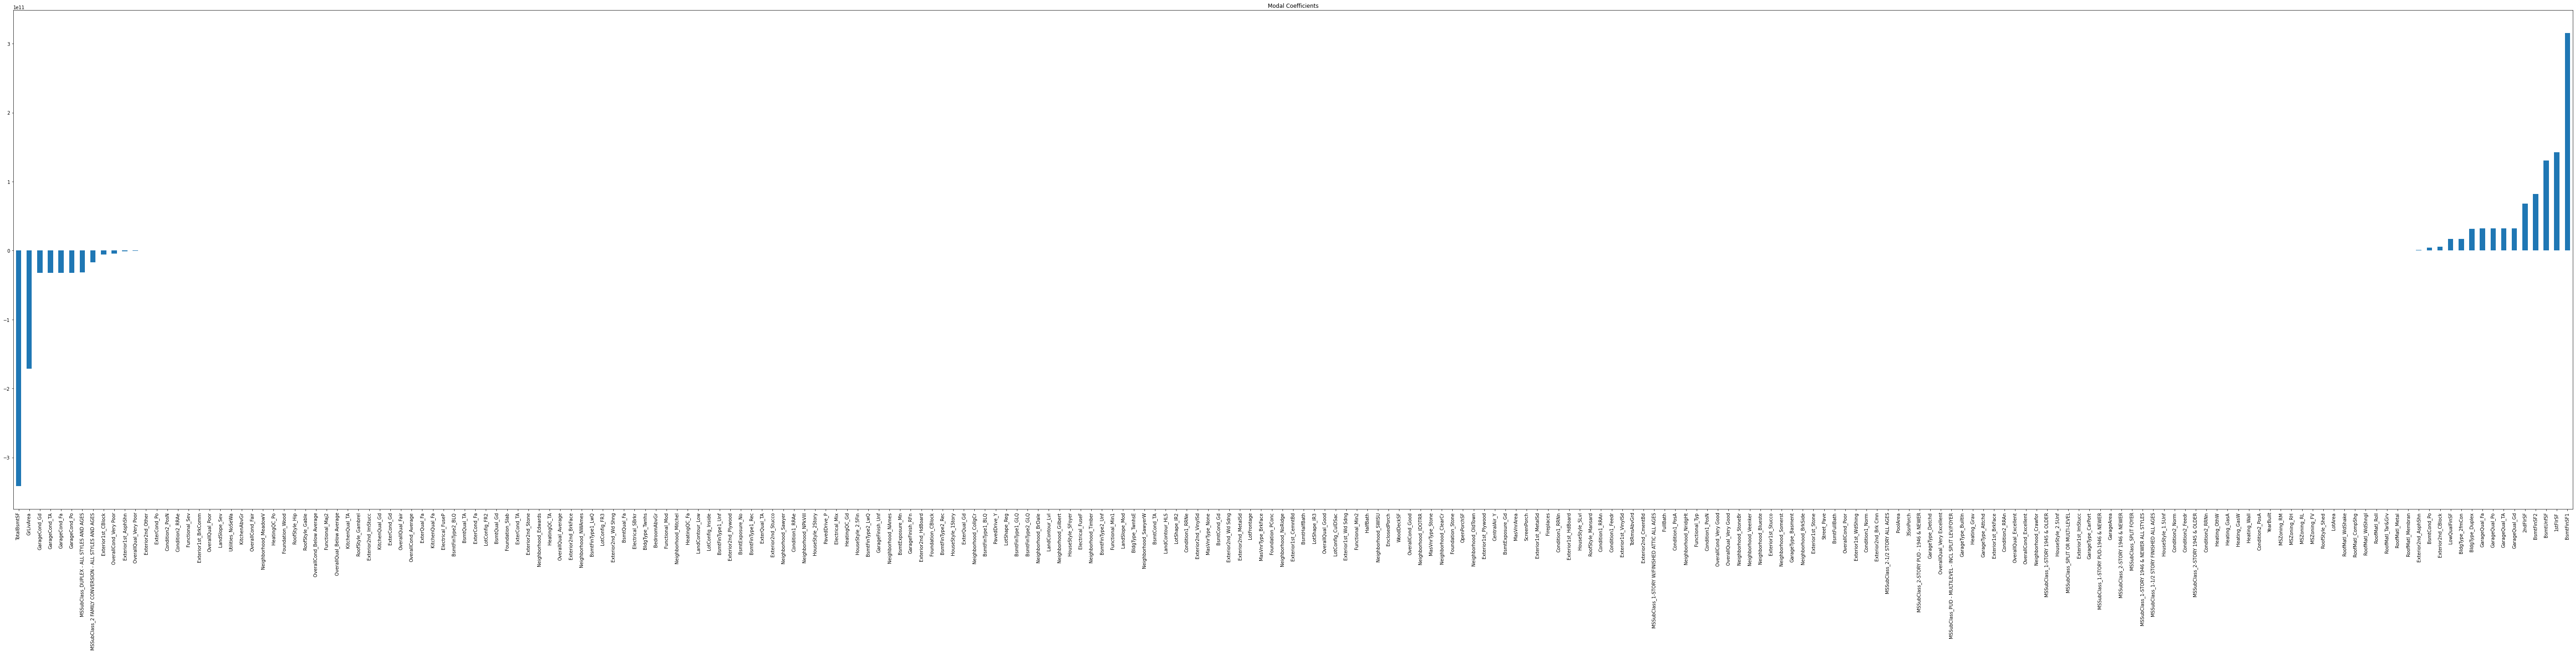

In [58]:
from pandas import Series, DataFrame

predictors = X_train.columns

coef = Series(lm.coef_,predictors).sort_values()

fig = coef.plot(kind='bar', title='Modal Coefficients')

from pylab import rcParams
rcParams['figure.figsize'] = 20, 100

plt.show ()

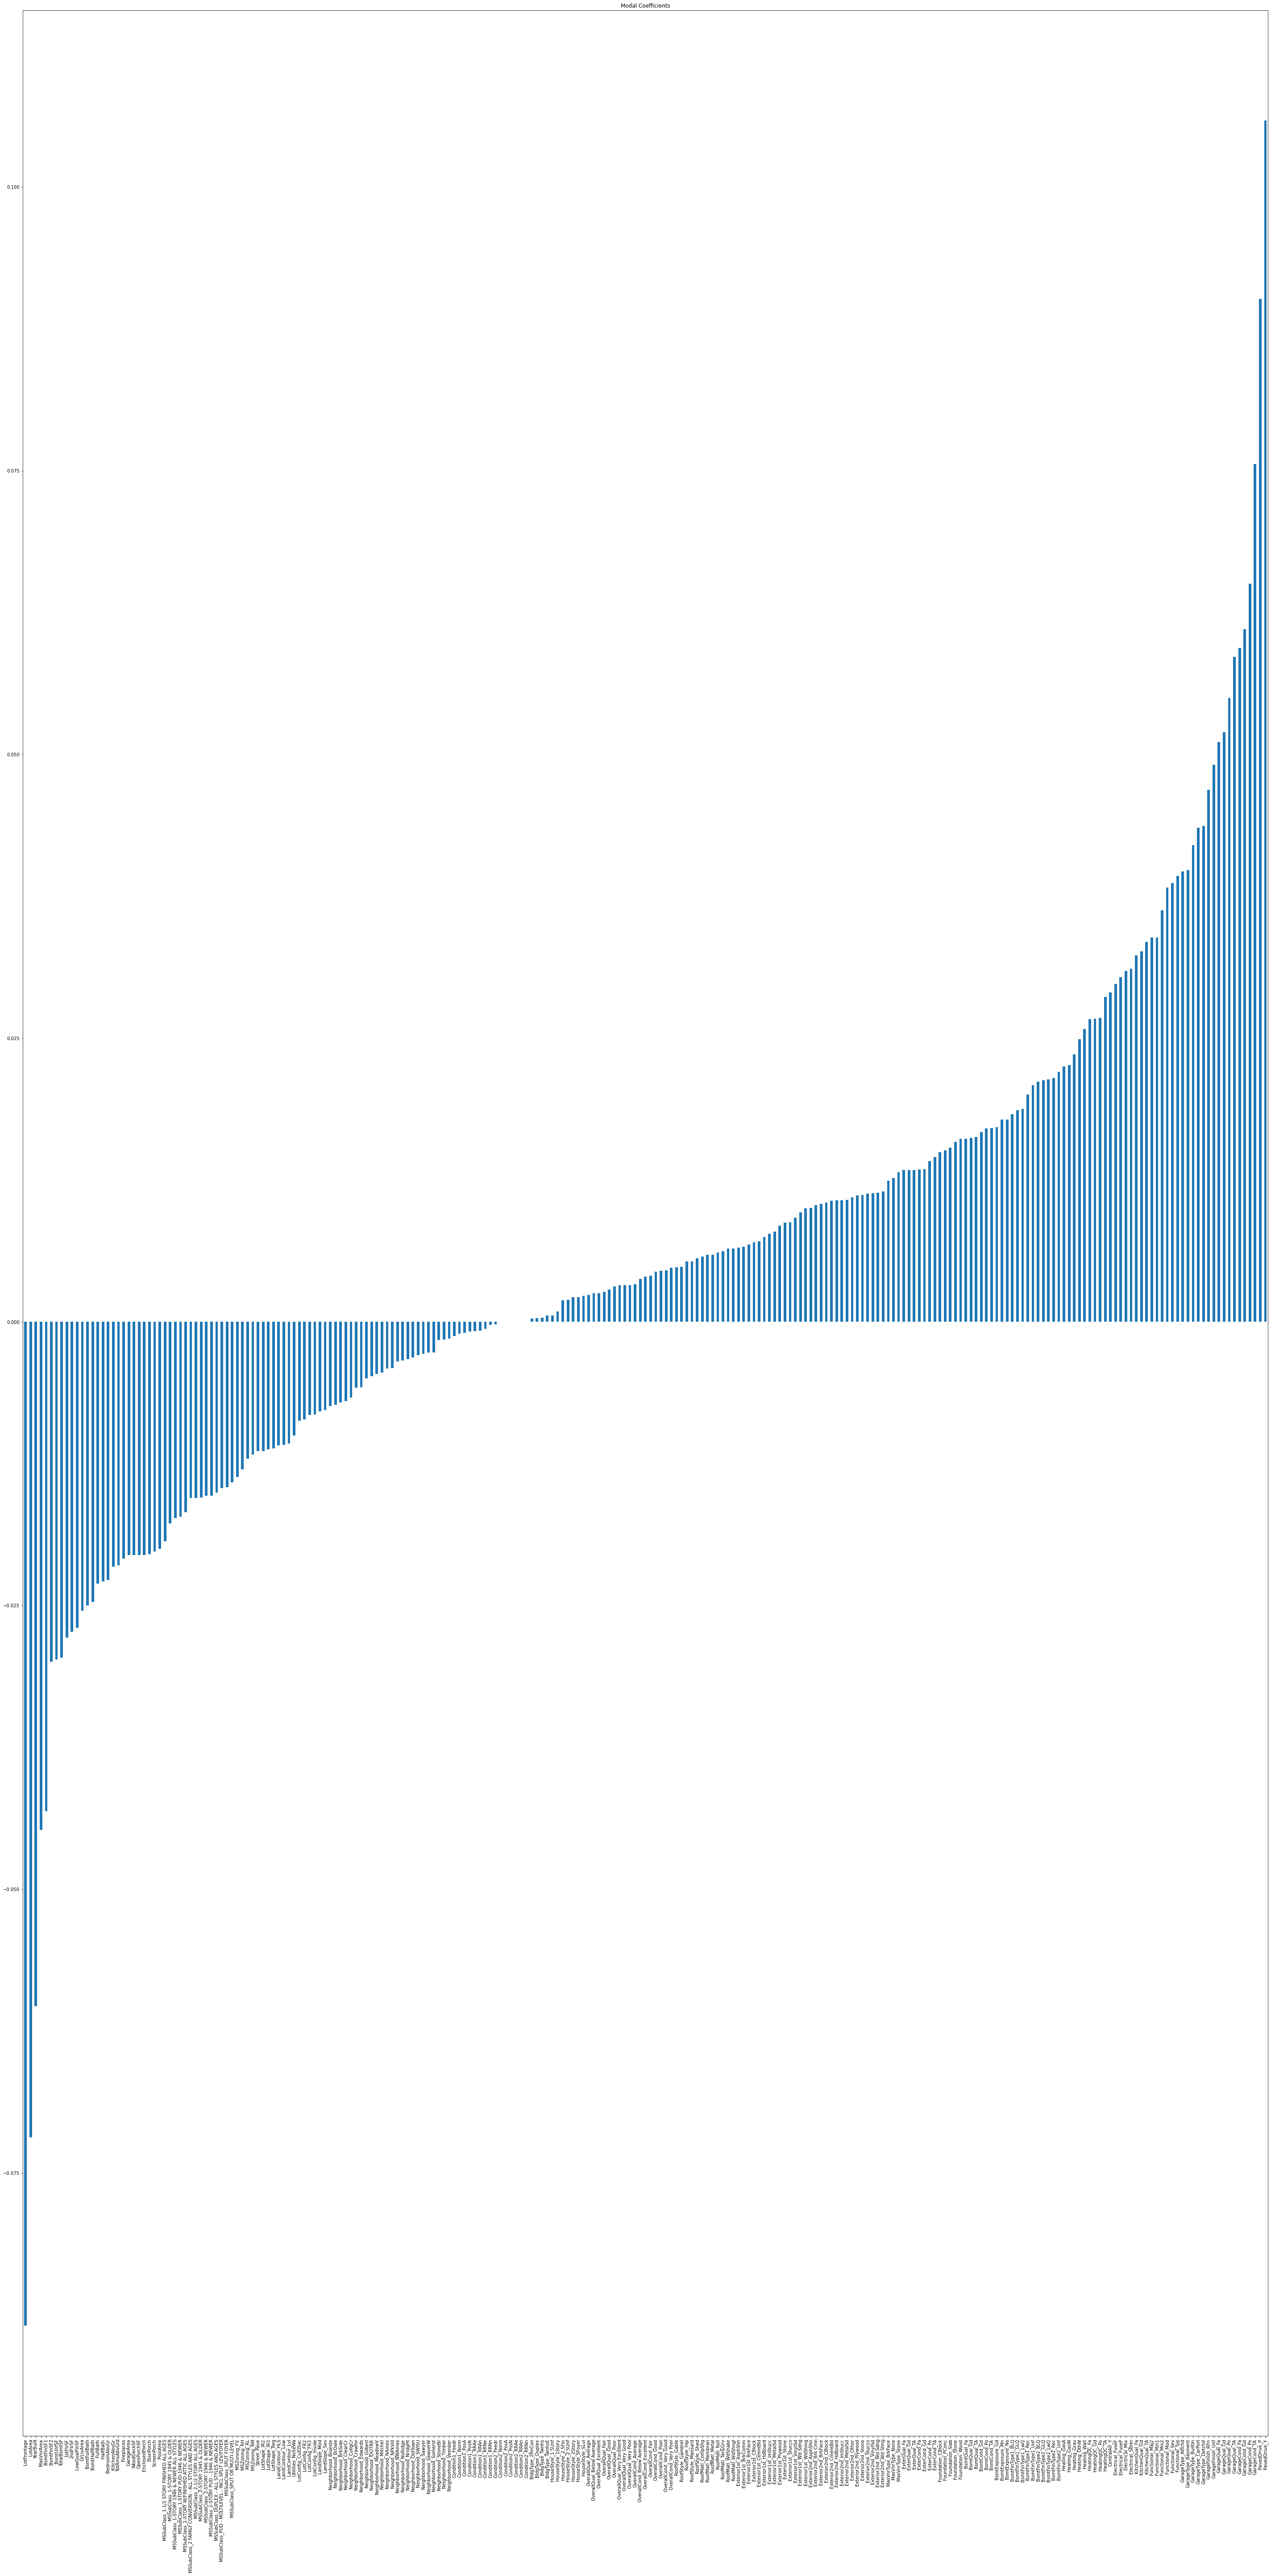

In [67]:
from pandas import Series, DataFrame

predictors = X_train.columns

coef = Series(ridge.coef_,predictors).sort_values()

fig = coef.plot(kind='bar', title='Modal Coefficients')

from pylab import rcParams
rcParams['figure.figsize'] = 50, 100

plt.show ()

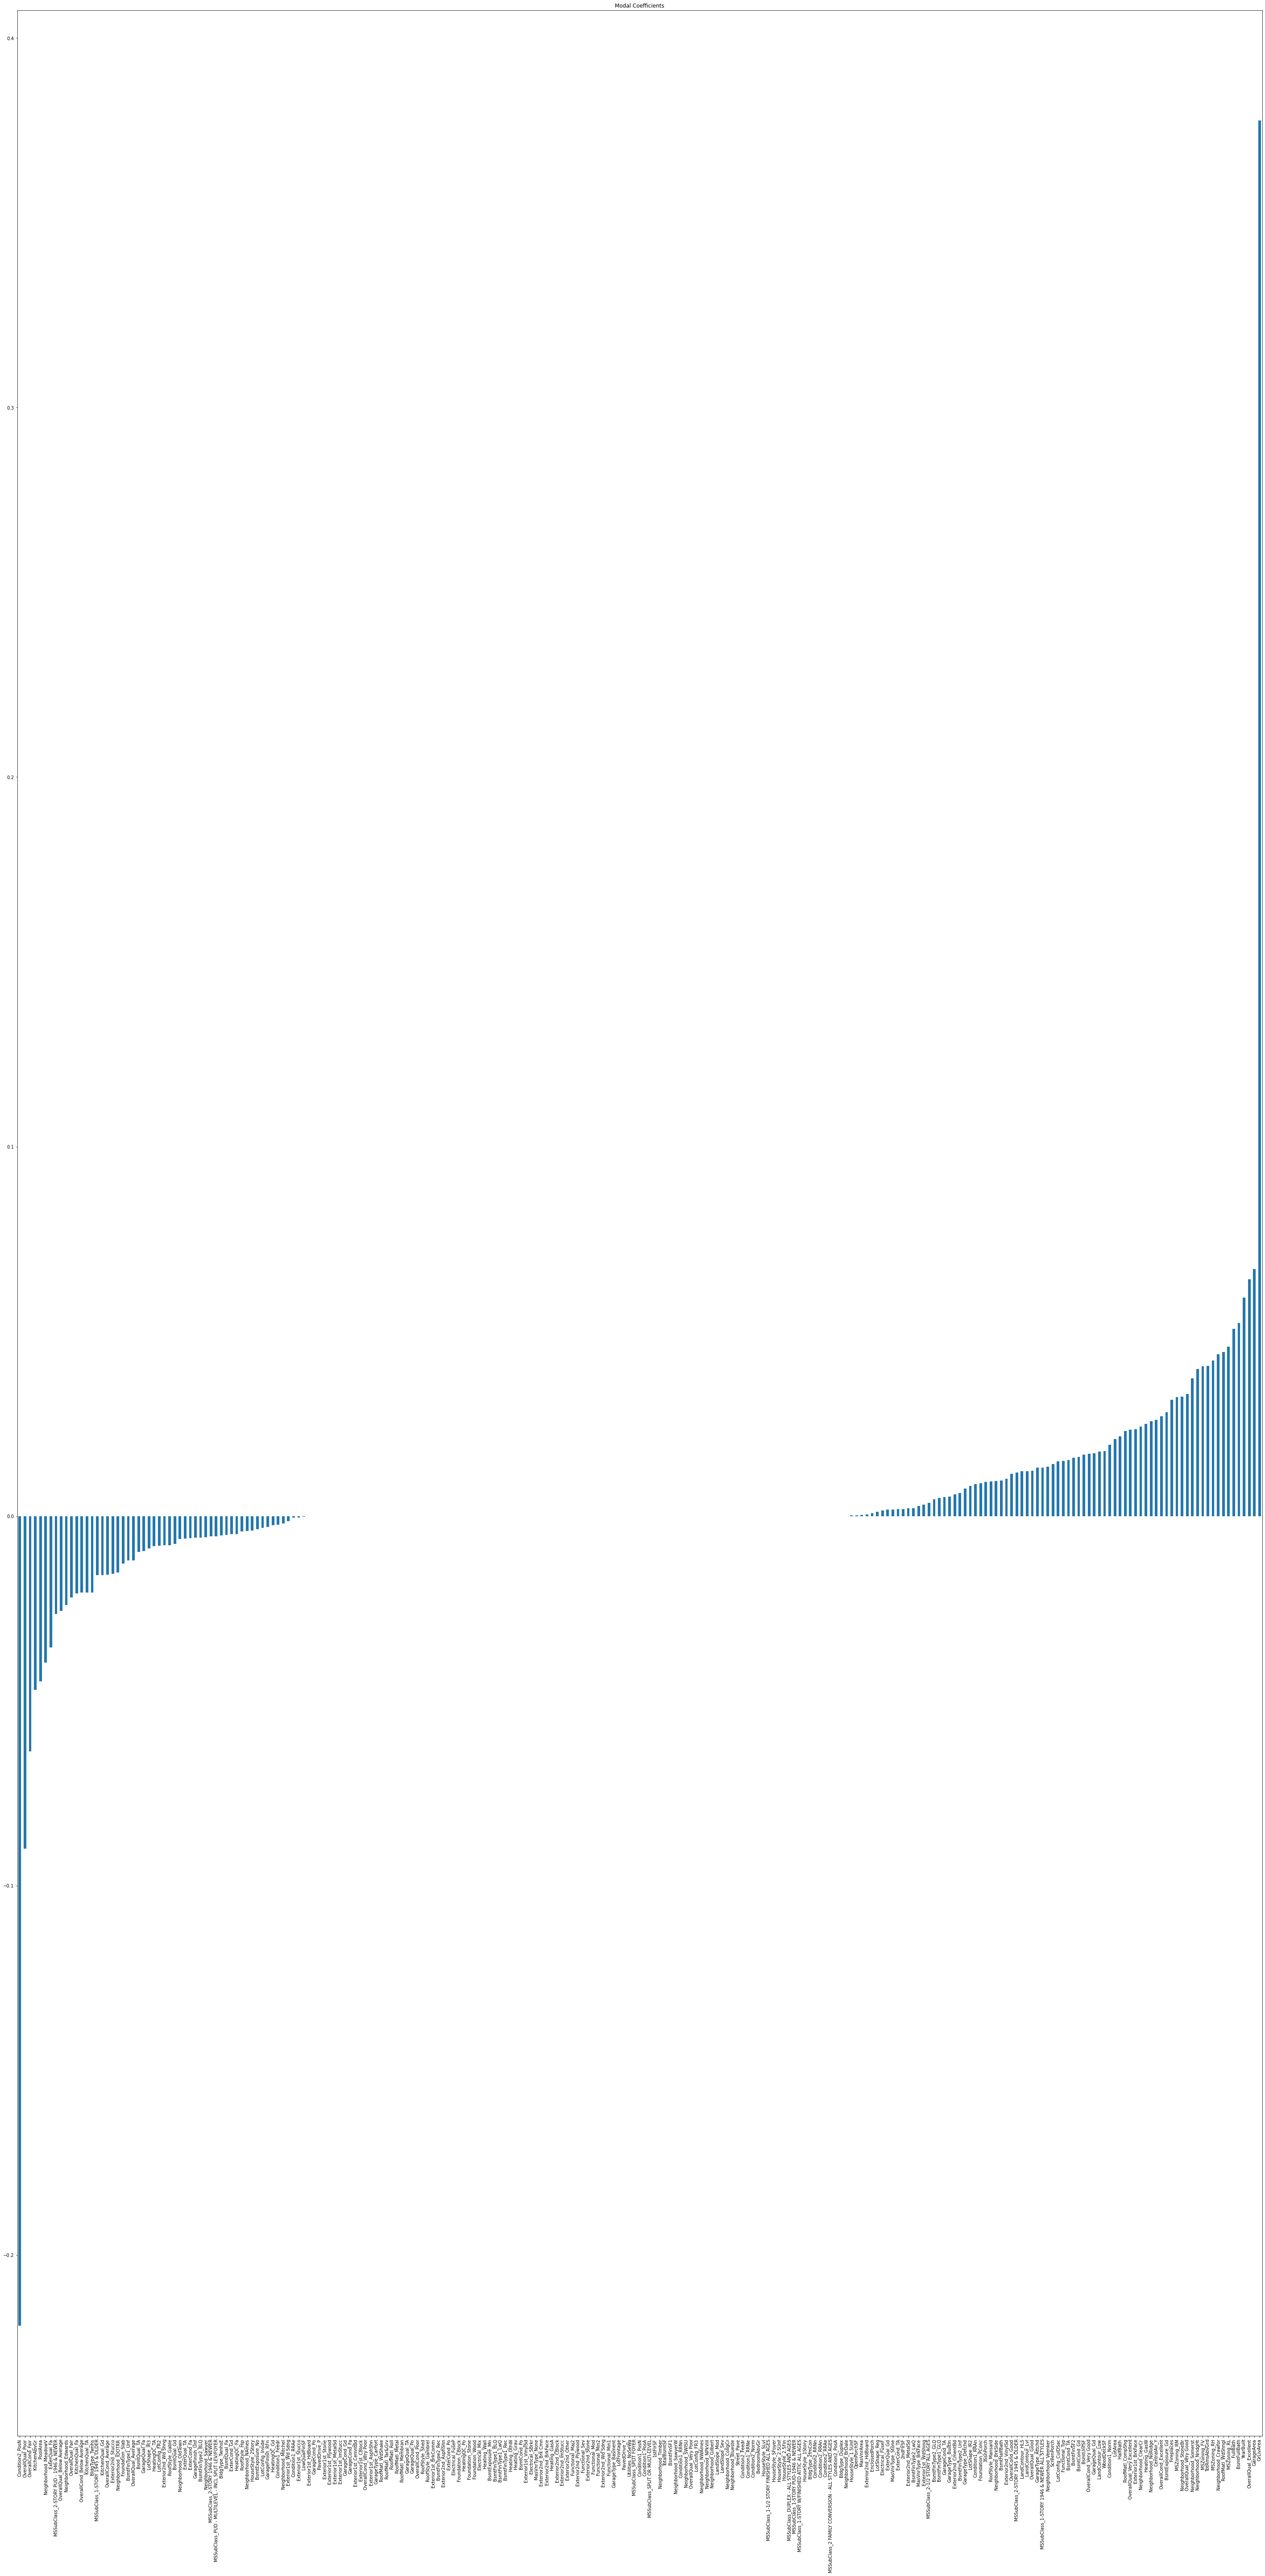

In [68]:
from pandas import Series, DataFrame

predictors = X_train.columns

coef = Series(lasso.coef_,predictors).sort_values()

fig = coef.plot(kind='bar', title='Modal Coefficients')

from pylab import rcParams
rcParams['figure.figsize'] = 50, 100

plt.show ()